In [35]:
!pip install pandas
!pip install numpy
!pip install folium

In [36]:
import pandas as pd
import numpy as np
import folium
import sqlite3

print('pd, np, folium and sqlite are ready for use')

pd, np, folium and sqlite are ready for use


In [38]:
url='https://raw.githubusercontent.com/MrGeegor/EU_maps/refs/heads/main/EU_Nuclear_Weapons.tsv?token=GHSAT0AAAAAADBHNY76GMVXKSWUDBWCDX5K2AH5U5Q'
df=pd.read_csv(url, sep='\t')

df.head()



,State,Military Base,Base Type,Transportation vehicle,Status,Type of nuclear head,Delivery mode,Estimated number of nuclear heads,Latitude,Longitude
0,Belgium,Kleine Brogel,Air Base,Airplane,"11 storage systems,\n10-20 bombs",B61-12,Air to ground,15.0,51.169877,5.470122
1,Germany,Fliegerhorst Büchel,Air Base,Airplane,"11 storage systems,\n10-20 bombs",B61-12,Air to ground,15.0,50.176313,7.064031
2,Germany,Ramstein Air Base,Air Base,Airplane,"55 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,49.439968,7.596437
3,Greece,Araxos,Air Base,Airplane,"11 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,37.926761,21.290844
4,United Kingdom,Lakenheath,Air Base,Airplane,"33 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,52.390828,0.537356


In [39]:
columns= ['State','Military_Base', 'Base_Type', 'Transportation_Vehicle', 'Status', 'Warhead_Model', 'Delivery_Mode', 'Est_Warheads', 'Latitude', 'Longitude']
df.columns=columns
df.head()

,State,Military_Base,Base_Type,Transportation_Vehicle,Status,Warhead_Model,Delivery_Mode,Est_Warheads,Latitude,Longitude
0,Belgium,Kleine Brogel,Air Base,Airplane,"11 storage systems,\n10-20 bombs",B61-12,Air to ground,15.0,51.169877,5.470122
1,Germany,Fliegerhorst Büchel,Air Base,Airplane,"11 storage systems,\n10-20 bombs",B61-12,Air to ground,15.0,50.176313,7.064031
2,Germany,Ramstein Air Base,Air Base,Airplane,"55 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,49.439968,7.596437
3,Greece,Araxos,Air Base,Airplane,"11 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,37.926761,21.290844
4,United Kingdom,Lakenheath,Air Base,Airplane,"33 storage systems,\ncurrently no weapons\nstored",B61-12,Air to ground,0.0,52.390828,0.537356


The Status column is not useful for our overview, hence it can be removed.

In [40]:
df= df.drop(columns='Status', axis=1)
df.head()

,State,Military_Base,Base_Type,Transportation_Vehicle,Warhead_Model,Delivery_Mode,Est_Warheads,Latitude,Longitude
0,Belgium,Kleine Brogel,Air Base,Airplane,B61-12,Air to ground,15.0,51.169877,5.470122
1,Germany,Fliegerhorst Büchel,Air Base,Airplane,B61-12,Air to ground,15.0,50.176313,7.064031
2,Germany,Ramstein Air Base,Air Base,Airplane,B61-12,Air to ground,0.0,49.439968,7.596437
3,Greece,Araxos,Air Base,Airplane,B61-12,Air to ground,0.0,37.926761,21.290844
4,United Kingdom,Lakenheath,Air Base,Airplane,B61-12,Air to ground,0.0,52.390828,0.537356


We remove the rows with 0.0 values in the Est_Warheads column, since they don't offer any value.

In [41]:
df['Est_Warheads']= pd.to_numeric(df['Est_Warheads'], errors='coerce').astype('Int64')

In [42]:
df= df[df['Est_Warheads']!=0]
df.head()

,State,Military_Base,Base_Type,Transportation_Vehicle,Warhead_Model,Delivery_Mode,Est_Warheads,Latitude,Longitude
0,Belgium,Kleine Brogel,Air Base,Airplane,B61-12,Air to ground,15,51.169877,5.470122
1,Germany,Fliegerhorst Büchel,Air Base,Airplane,B61-12,Air to ground,15,50.176313,7.064031
5,Italy,Aviano,Air Base,Airplane,B61-12,Air to ground,50,46.030576,12.613739
6,Italy,Ghedi Torre,Air Base,Airplane,B61-12,Air to ground,15,45.436554,10.283349
7,Netherlands,VolkeI,Air Base,Airplane,B61-12,Air to ground,15,51.656148,5.674648


In [43]:
df

,State,Military_Base,Base_Type,Transportation_Vehicle,Warhead_Model,Delivery_Mode,Est_Warheads,Latitude,Longitude
0,Belgium,Kleine Brogel,Air Base,Airplane,B61-12,Air to ground,15,51.169877,5.470122
1,Germany,Fliegerhorst Büchel,Air Base,Airplane,B61-12,Air to ground,15,50.176313,7.064031
5,Italy,Aviano,Air Base,Airplane,B61-12,Air to ground,50,46.030576,12.613739
6,Italy,Ghedi Torre,Air Base,Airplane,B61-12,Air to ground,15,45.436554,10.283349
7,Netherlands,VolkeI,Air Base,Airplane,B61-12,Air to ground,15,51.656148,5.674648
9,Turkey,Incirlik Air Base,Air Base,Airplane,B61-12,Air to ground,65,37.004126,35.434032
13,United Kingdom,Faslane,Naval Base,Submarine,Holbrook,Sea to ground,210,56.067509,-4.814590
17,France,Saint-Dizier,Air Base,Airplane,TNA,Air to ground,50,48.627259,4.897514
18,France,Île Longue Crozon,Naval Base,Submarine,TN 75 / TNO,Sea to ground,288,48.305753,-4.507675
19,France,Landivisiau,Air Base,Airplane,TNA,Air to ground,42,48.522645,-4.147388


Now let's start looking at the data we have a bit more closely.

In [44]:
df.describe()

,Est_Warheads,Latitude,Longitude
count,10.0,10.000000,10.000000
mean,76.5,48.299676,6.796778
std,94.522484,4.993971,11.809472
min,15.0,37.004126,-4.814590
25%,15.0,46.599370,-1.886162
50%,46.0,48.574952,5.572385
75%,61.25,50.921486,9.478519
max,288.0,56.067509,35.434032


In [45]:
print(df[df['Est_Warheads']==288.0])

     State      Military_Base   Base_Type Transportation_Vehicle  \
18  France  Île Longue Crozon  Naval Base              Submarine   

   Warhead_Model  Delivery_Mode  Est_Warheads   Latitude  Longitude  
18   TN 75 / TNO  Sea to ground           288  48.305753  -4.507675  


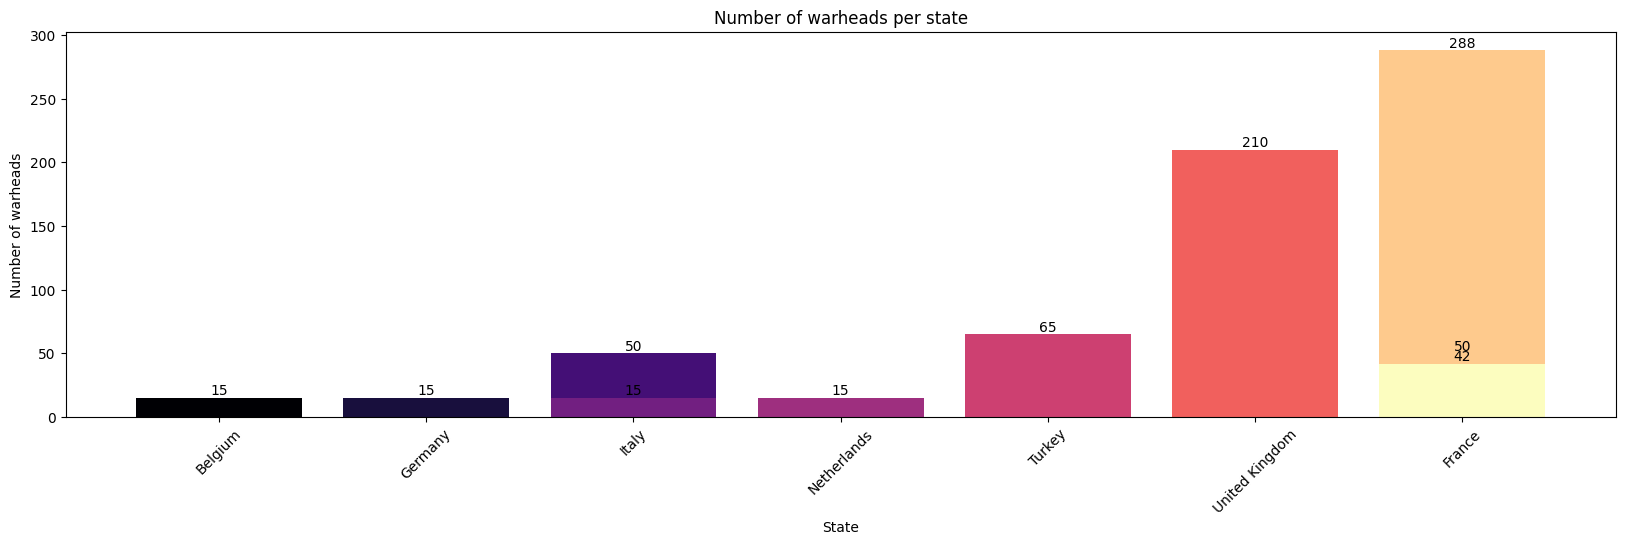

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,5))

cmap = plt.get_cmap('magma')
num_bars = len(df['State'])
colors = cmap(np.linspace(0, 1, num_bars))

bars = plt.bar(x=df['State'], height=df['Est_Warheads'], color=colors)

plt.ylabel('Number of warheads')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.title('Number of warheads per state')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')


plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   10 non-null     object 
 1   Military_Base           10 non-null     object 
 2   Base_Type               10 non-null     object 
 3   Transportation_Vehicle  10 non-null     object 
 4   Warhead_Model           10 non-null     object 
 5   Delivery_Mode           10 non-null     object 
 6   Est_Warheads            10 non-null     Int64  
 7   Latitude                10 non-null     float64
 8   Longitude               10 non-null     float64
dtypes: Int64(1), float64(2), object(6)
memory usage: 810.0+ bytes


In [48]:
print(df.isnull().sum())

State                     0
Military_Base             0
Base_Type                 0
Transportation_Vehicle    0
Warhead_Model             0
Delivery_Mode             0
Est_Warheads              0
Latitude                  0
Longitude                 0
dtype: int64


In [49]:
print(df.Est_Warheads.sum())

765


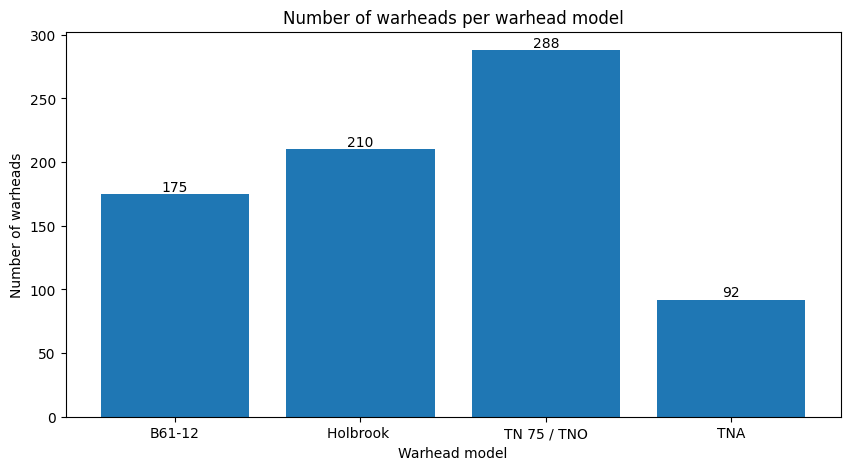

In [50]:
warhead_counts = df.groupby('Warhead_Model')['Est_Warheads'].sum().reset_index()

plt.figure(figsize=(10,5))

bars = plt.bar(x=warhead_counts['Warhead_Model'], height=warhead_counts['Est_Warheads'],data = warhead_counts)
plt.ylabel('Number of warheads')
plt.xlabel('Warhead model')
plt.title('Number of warheads per warhead model')

# Add the exact number of warheads per type to the graph
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

We're adding a column in our dataframe to indicate the ultimate owners of the nuclear warheads.

In [51]:
# First removing trailing spaces in 'Warhead_Model' column
df['Warhead_Model'] = df['Warhead_Model'].str.strip()

# Adding and populating the new NukeOwner column
df['NukeOwner'] = df['Warhead_Model'].map({
    'B61-12': 'USA',
    'Holbrook': 'United Kingdom'
}).fillna('France')

# Visualising the ultimate ownership
ownership_counts = df.groupby('NukeOwner')['Est_Warheads'].sum().reset_index()

# Adding a column to ownership_counts for percentages of total warhead ownership in Europe
ownership_counts['Percentage'] = (ownership_counts['Est_Warheads']/ownership_counts['Est_Warheads'].sum())*100


ownership_counts.sort_values(by='Est_Warheads', ascending=False)



,NukeOwner,Est_Warheads,Percentage
0,France,380,49.673203
2,United Kingdom,210,27.45098
1,USA,175,22.875817


Some learnings from the data exploration above:
* across Europe we have about 765 nuclear warheads stationed in 10 military bases across 7 countries with warheads ready for deployment
* Ultimate ownership: France commands around 380 warheads, the United Kingdom 210 and the USA 175. This accounts respectively for approximately 50% French, 27% British and 23% American ownership.

# Creating the EU nukes map


In [62]:
import folium

# Initialize the map without default tiles
europe_map = folium.Map(
    location=[51.0, 5.0],
    zoom_start=5,
    tiles=None
)

folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png',
    attr='&copy; <a href="https://carto.com/">CARTO</a>',
    name='CartoDB Dark Matter',
    control=True
).add_to(europe_map)

Adding the bases will be done with a list of dictionaries, containing the location coordinates and pop-ups stating the name of the bases. First we'll create a function to colour code the markers depending on the ultimate ownership of the nuclear warheads.

In [63]:
def get_color(owner):
    if owner == 'USA':
        return 'blue'
    elif owner == 'United Kingdom':
        return 'red'
    elif owner == 'France':
        return 'green'
    else:
        return 'gray'  # fallback for unknowns

locations = [
    {
        'location': [row['Latitude'], row['Longitude']],
        'popup': f"{row['Military_Base']}<br>Warheads: {row['Est_Warheads']}<br>Model: {row['Warhead_Model']}",
        'color': get_color(row['NukeOwner'])
    }
    for _, row in df.iterrows()
]

locations

[{'location': [51.169876515902246, 5.470122097607789],
  'popup': 'Kleine Brogel<br>Warheads: 15<br>Model: B61-12',
  'color': 'blue'},
 {'location': [50.17631265040743, 7.06403138221628],
  'popup': 'Fliegerhorst Büchel <br>Warheads: 15<br>Model: B61-12',
  'color': 'blue'},
 {'location': [46.03057613216991, 12.61373853593828],
  'popup': 'Aviano<br>Warheads: 50<br>Model: B61-12',
  'color': 'blue'},
 {'location': [45.43655380178095, 10.283348663584952],
  'popup': 'Ghedi Torre<br>Warheads: 15<br>Model: B61-12',
  'color': 'blue'},
 {'location': [51.65614787491996, 5.674647689837427],
  'popup': 'VolkeI<br>Warheads: 15<br>Model: B61-12',
  'color': 'blue'},
 {'location': [37.004125822984335, 35.43403204475581],
  'popup': 'Incirlik Air Base<br>Warheads: 65<br>Model: B61-12',
  'color': 'blue'},
 {'location': [56.06750863152991, -4.814589659715612],
  'popup': 'Faslane<br>Warheads: 210<br>Model: Holbrook',
  'color': 'red'},
 {'location': [48.6272589187524, 4.897514168655063],
  'popup

In [64]:
for loc in locations:
  folium.Marker(
      location = loc['location'],
      popup = loc['popup'],
      icon= folium.Icon(color=loc['color'])
  ).add_to(europe_map)

europe_map

In [65]:
legend_html = '''
     <div style="
         position: fixed;
         bottom: 50px;
         left: 50px;
         width: 160px;
         height: 140px;
         z-index:9999;
         font-size:14px;
         background-color: white;
         border:2px solid grey;
         border-radius:8px;
         padding: 10px;">
     <b>Nuclear Warhead Ownership</b><br>
     <i class="fa fa-map-marker fa-2x" style="color:lightblue"></i>&nbsp;USA<br>
     <i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp;UK<br>
     <i class="fa fa-map-marker fa-2x" style="color:lightgreen"></i>&nbsp;France<br>
     </div>
     '''

europe_map.get_root().html.add_child(folium.Element(legend_html))

europe_map

In [66]:
europe_map.save('EU_nukes_map.html')

Feel free to download this map.

In [68]:
from google.colab import files
files.download("EU_nukes_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Or view the map in a new browser window.

In [69]:
from IPython.display import HTML

HTML('<a href="EU_nukes_map.html" target="_blank">🔗 Open Map in New Tab</a>')